In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
file_path = '/content/drive/MyDrive/Practicum/datasets after process/customer_agg.csv'
customer_agg = pd.read_csv(file_path)

# Define features and target
features = ['customer_lifetime', 'recency', 'total_amount']
X = customer_agg[features]
y = customer_agg['clv']

# Display the columns of the dataset
print("Customer Aggregation Columns:", customer_agg.columns.tolist())
customer_agg.head()

Customer Aggregation Columns: ['customer_id', 'purchase_frequency', 'total_amount', 'recency', 'customer_lifetime', 'clv']


,customer_id,purchase_frequency,total_amount,recency,customer_lifetime,clv
0,C0100000111,6,882.97,80,281,882.97
1,C0100000199,3,597.00,73,191,597.00
2,C0100000343,6,700.94,24,308,700.94
3,C0100000375,4,223.98,65,289,223.98
4,C0100000392,32,626.12,25,327,626.12


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Impute missing values for numerical features
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy='mean')
X_train[features] = num_imputer.fit_transform(X_train[features])
X_test[features] = num_imputer.transform(X_test[features])

# Standardize numerical features
scaler = StandardScaler()
X_train[features] = scaler.fit_transform(X_train[features])
X_test[features] = scaler.transform(X_test[features])

In [7]:
# Train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
r2_dt = r2_score(y_test, y_pred_dt)

# Print the evaluation metrics
print(f"Decision Tree - MAE: {mae_dt:.4f}, RMSE: {rmse_dt:.4f}, R2: {r2_dt:.4f}")

Decision Tree - MAE: 0.0897, RMSE: 3.6626, R2: 0.9999


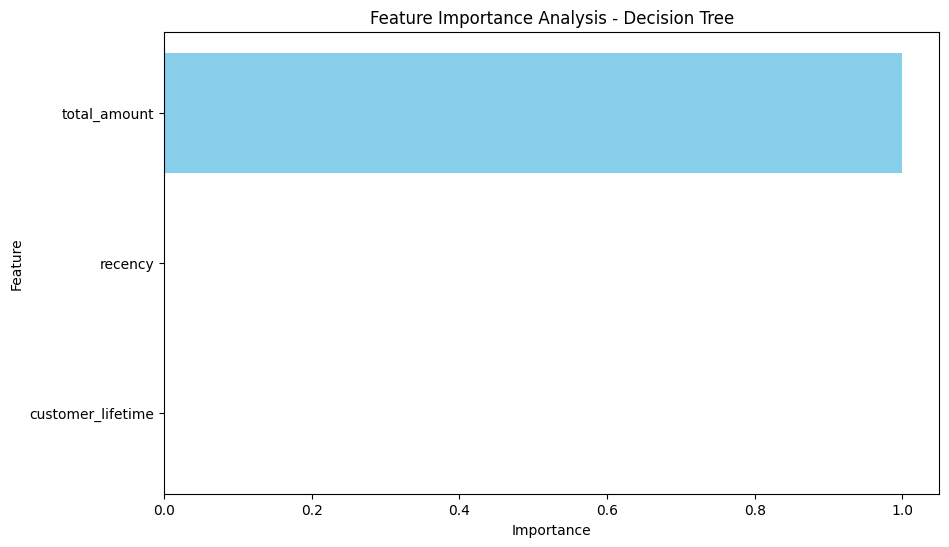

In [8]:
# Plot feature importances
importances = dt_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis - Decision Tree')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

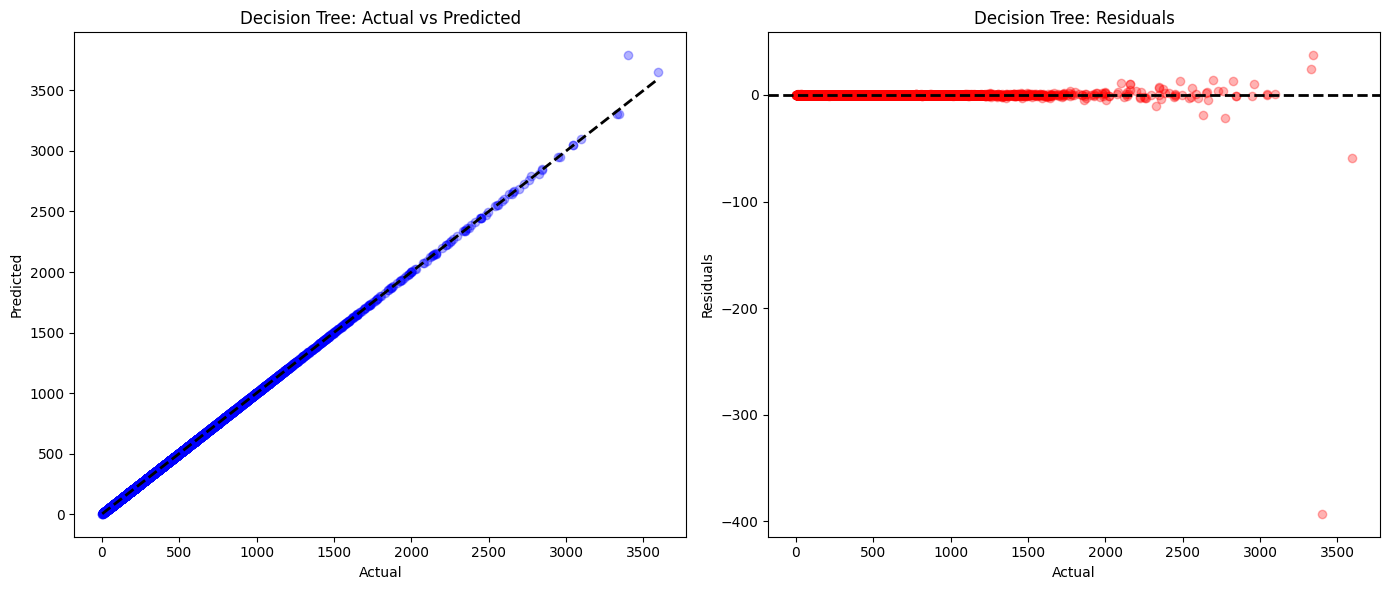

In [9]:
# Plot predicted vs actual values
plt.figure(figsize=(14, 6))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_dt, alpha=0.3, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree: Actual vs Predicted')

# Residual plot
plt.subplot(1, 2, 2)
residuals_dt = y_test - y_pred_dt
plt.scatter(y_test, residuals_dt, alpha=0.3, color='red')
plt.axhline(0, color='black', linestyle='--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Decision Tree: Residuals')

plt.tight_layout()
plt.show()